<a href="https://colab.research.google.com/github/sandovaledwin/machine-learning-models/blob/main/sklearn-logistic-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This exercise was taken from:
# https://stackoverflow.com/questions/38077190/how-to-increase-the-model-accuracy-of-logistic-regression-in-scikit-python

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
# read data
data = pd.read_csv("https://gist.githubusercontent.com/abyalias/3de80ab7fb93dcecc565cee21bd9501a/raw/d9d70f7e16082b09850aa545db86897c68ac3e71/gpa_final.csv", sep='\t')


In [3]:
# split into train and test data
xtrain, xtest = train_test_split(data, random_state=2)

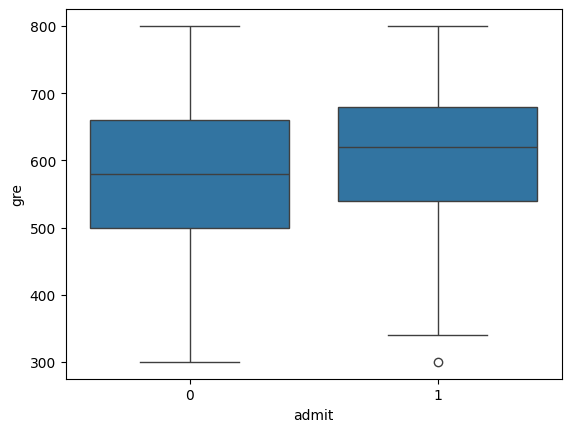

In [4]:
# boxplot
sns.boxplot(x='admit', y='gre', data=xtrain);

In [5]:
# remove outliers from training set
ztrain = xtrain.query("not ((admit==1 and gre < 350) or (admit==0 and gre>=800))")


In [6]:
# split into x and y variables
ytrain = ztrain.pop('admit')
ytest = xtest.pop('admit')

In [7]:
ztrain.head()

,gre,gpa,rank_2,rank_3,rank_4
276,460,3.77,0,1,0
251,620,3.21,0,0,1
29,520,3.29,0,0,0
109,480,3.45,1,0,0
244,540,3.04,0,0,0


In [8]:
# normalize the data
sc = StandardScaler()
ztrain = sc.fit_transform(ztrain)
ztest = sc.transform(xtest)

In [11]:
# how it looks the normalized train data
ztrain[0:5]

array([[-1.15358895,  1.05602668, -0.75955453,  1.49154923, -0.45374261],
       [ 0.38274529, -0.40875806, -0.75955453, -0.67044385,  2.20389266],
       [-0.57746361, -0.1995031 , -0.75955453, -0.67044385, -0.45374261],
       [-0.96154717,  0.21900683,  1.31656118, -0.67044385, -0.45374261],
       [-0.38542183, -0.85342486, -0.75955453, -0.67044385, -0.45374261]])

In [12]:
# add polynomial features
poly = PolynomialFeatures(degree=4)
ztrain = poly.fit_transform(ztrain)
ztest = poly.transform(ztest)

In [16]:
# model training
clf = LogisticRegression(penalty=None, max_iter=1000)
clf.fit(ztrain, ytrain)

LogisticRegression(max_iter=1000, penalty=None)

In [17]:
# checking accuracy
print("Train accuracy =", clf.score(ztrain, ytrain))   # 0.7665505226480837
print("Test accuracy  =", clf.score(ztest, ytest))     # 0.76

Train accuracy = 0.7665505226480837
Test accuracy  = 0.76
